In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



Bad key "text.kerning_factor" on line 4 in
/home/sina/anaconda3/envs/tf/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
Rental.info()

In [ ]:
Rental.describe() #shows a summary of the numerical attributes


In [5]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin']



In [ ]:
Berlin.shape

In [257]:
corr_matrix = Berlin.corr()
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [ ]:
Berlin["totalRent"].describe()


In [ ]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


In [ ]:
Berlin.plot(kind="scatter", x="livingSpace", y="totalRent", alpha=0.1)


In [ ]:
Berlin.plot(kind="scatter", x="yearConstructed", y="totalRent", alpha=0.1)

In [6]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

In [7]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")




# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [8]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [9]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 'baseRent',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [265]:
X_train.shape

(7772, 12)

In [266]:
X_test.shape

(1943, 12)

# Start fine tunning ---------------------------------

## fine tunning randomForest

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([0.0796063 , 0.07409101, 0.07956217, 0.08278567, 0.08676366,
       0.07630945, 0.0810117 , 0.07363993, 0.07441055, 0.10304853])

In [11]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.0796063  0.07409101 0.07956217 0.08278567 0.08676366 0.07630945
 0.0810117  0.07363993 0.07441055 0.10304853]
Mean: 0.08112289893731263
Standard deviation: 0.008329054712005755


In [14]:
from sklearn.linear_model import LinearRegression

lin_scores = cross_val_score(tree_reg, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.07832098 0.07969852 0.06978723 0.08670943 0.07015271 0.07681674
 0.07855206 0.0704443  0.07719867 0.08127098]
Mean: 0.07689516109831755
Standard deviation: 0.005155579729796297


In [15]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
prediction = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0553588336782709

In [16]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.05844077 0.06107411 0.05293587 0.06395612 0.04875281 0.05765504
 0.06098732 0.05728286 0.05540331 0.05936269]
Mean: 0.05758508978396339
Standard deviation: 0.004155855048276057


In [19]:

scores = cross_val_score(forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.058080
std       0.004472
min       0.049543
25%       0.055803
50%       0.058832
75%       0.061458
max       0.063976
dtype: float64

### Support Vector Machine regressor

In [279]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_test, y_test)
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6213737413762

### Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [21]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [22]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1219768686877165 {'max_features': 2, 'n_estimators': 3}
0.09445116773985708 {'max_features': 2, 'n_estimators': 10}
0.08826218176902428 {'max_features': 2, 'n_estimators': 30}
0.08803707683270089 {'max_features': 4, 'n_estimators': 3}
0.07153097891108182 {'max_features': 4, 'n_estimators': 10}
0.06626991372746953 {'max_features': 4, 'n_estimators': 30}
0.07242429759505238 {'max_features': 6, 'n_estimators': 3}
0.0647978835219683 {'max_features': 6, 'n_estimators': 10}
0.061581897889644494 {'max_features': 6, 'n_estimators': 30}
0.07042242264314928 {'max_features': 11, 'n_estimators': 3}
0.0641030038112501 {'max_features': 11, 'n_estimators': 10}
0.06273099152506317 {'max_features': 11, 'n_estimators': 30}
0.10832401490956334 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.0948104027312622 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.09181531171476981 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.07792223279087546 {'bootstrap': False, 'max_

In [286]:
pd.DataFrame(grid_search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015829,0.002485,0.001706,0.000179,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.011139,-0.012486,-0.012837,-0.010476,-0.014277,-0.012243,0.001334,18
1,0.043210,0.001107,0.003908,0.000449,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.009664,-0.008506,-0.008631,-0.007812,-0.010088,-0.008940,0.000824,16
2,0.126477,0.002892,0.009594,0.000750,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.008604,-0.007425,-0.007238,-0.007094,-0.008837,-0.007840,0.000731,13
3,0.022756,0.003137,0.002347,0.000647,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.009252,-0.006084,-0.008220,-0.006032,-0.008628,-0.007643,0.001335,12
4,0.060426,0.002315,0.003874,0.000324,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.004984,-0.004801,-0.004042,-0.005312,-0.006427,-0.005113,0.000778,7
5,0.174094,0.005693,0.008860,0.000222,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.004438,-0.003773,-0.003960,-0.004072,-0.005861,-0.004421,0.000752,5
6,0.024564,0.000458,0.001879,0.000132,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.005479,-0.004423,-0.005215,-0.004910,-0.006601,-0.005326,0.000728,9
7,0.074995,0.001675,0.003551,0.000148,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.003458,-0.003743,-0.003809,-0.003906,-0.005963,-0.004176,0.000906,3
8,0.222104,0.002375,0.008801,0.000195,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.003408,-0.003264,-0.003390,-0.003716,-0.005452,-0.003846,0.000817,1
9,0.037199,0.000209,0.001759,0.000039,11,3,NaN,"{'max_features': 11, 'n_estimators': 3}",-0.004416,-0.004172,-0.004462,-0.004600,-0.006709,-0.004872,0.000929,6


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32984aefd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32984a3190>},
                   scoring='neg_mean_squared_error')

In [25]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 118}

In [26]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=118)

In [27]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.08513102021596249 {'max_features': 2, 'n_estimators': 117}
0.07110641457981384 {'max_features': 3, 'n_estimators': 130}
0.08408863059169039 {'max_features': 2, 'n_estimators': 185}
0.08415545695661163 {'max_features': 2, 'n_estimators': 79}
0.06444740962065208 {'max_features': 4, 'n_estimators': 187}
0.06065318693758362 {'max_features': 6, 'n_estimators': 118}
0.06259060786655189 {'max_features': 7, 'n_estimators': 19}
0.07133539643923931 {'max_features': 3, 'n_estimators': 180}
0.06081620956758244 {'max_features': 6, 'n_estimators': 85}
0.0654727558767352 {'max_features': 4, 'n_estimators': 59}


In [28]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.91258262e-03, 7.08742937e-03, 8.05114373e-04, 2.20141184e-01,
       7.83091520e-02, 6.01529624e-04, 6.73846149e-01, 2.65997457e-03,
       9.80014590e-03, 1.12127326e-03, 5.43147958e-04, 3.17231715e-03])

In [29]:
final_model = grid_search.best_estimator_

#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.05476402355523008

## fine tunning GradientBoosting -----------------------------------------------

In [30]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [ ]:
"""from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor


gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train, y_train)

gradient_scores = cross_val_score(gradient_reg, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10)
gradient_rmse_scores = np.sqrt(-gradient_scores)"""

In [ ]:
"""gradient_scores = cross_val_score(gradient_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
gradient_rmse_scores = np.sqrt(-gradient_scores)
display_scores(gradient_rmse_scores)"""

# Check if works

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)
housing_predictions = grad_reg.predict(X_train)
grad_mse = mean_squared_error(y_train, housing_predictions)
grad_rmse = np.sqrt(grad_mse)
grad_rmse

0.21777392293860906

In [32]:
from sklearn.model_selection import cross_val_score

grad_scores = cross_val_score(grad_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-grad_scores)
display_scores(grad_rmse_scores)

Scores: [0.23240725 0.22952003 0.21846255 0.22869954 0.21462555 0.22842975
 0.22126938 0.21617496 0.22502803 0.23757788]
Mean: 0.2252194927685794
Standard deviation: 0.007075565383936913


In [33]:
scores = cross_val_score(grad_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.225205
std       0.007474
min       0.214626
25%       0.219110
50%       0.226720
75%       0.229319
max       0.237578
dtype: float64

### Support Vector Machine regressor

In [34]:

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
housing_predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.25355058935523556

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

gradientBoosting_reg = GradientBoostingRegressor()

gradientBoosting_search = GridSearchCV(gradientBoosting_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
gradientBoosting_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [37]:
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=30)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1219768686877165 {'max_features': 2, 'n_estimators': 3}
0.09445116773985708 {'max_features': 2, 'n_estimators': 10}
0.08826218176902428 {'max_features': 2, 'n_estimators': 30}
0.08803707683270089 {'max_features': 4, 'n_estimators': 3}
0.07153097891108182 {'max_features': 4, 'n_estimators': 10}
0.06626991372746953 {'max_features': 4, 'n_estimators': 30}
0.07242429759505238 {'max_features': 6, 'n_estimators': 3}
0.0647978835219683 {'max_features': 6, 'n_estimators': 10}
0.061581897889644494 {'max_features': 6, 'n_estimators': 30}
0.07042242264314928 {'max_features': 11, 'n_estimators': 3}
0.0641030038112501 {'max_features': 11, 'n_estimators': 10}
0.06273099152506317 {'max_features': 11, 'n_estimators': 30}
0.10832401490956334 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.0948104027312622 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.09181531171476981 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.07792223279087546 {'bootstrap': False, 'max_

In [39]:
pd.DataFrame(grid_search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015530,0.002363,0.001757,0.000125,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.016638,-0.015694,-0.013133,-0.015115,-0.013813,-0.014878,0.001265,18
1,0.042630,0.000553,0.003587,0.000156,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.009605,-0.008151,-0.009200,-0.008447,-0.009202,-0.008921,0.000537,15
2,0.121784,0.000962,0.008639,0.000132,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.007902,-0.007739,-0.006795,-0.006638,-0.009878,-0.007790,0.001157,13
3,0.018434,0.000602,0.001769,0.000160,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.008698,-0.007279,-0.007128,-0.008239,-0.007408,-0.007751,0.000610,12
4,0.057352,0.002959,0.003488,0.000083,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.005176,-0.004620,-0.004530,-0.004746,-0.006511,-0.005117,0.000732,8
5,0.165009,0.000912,0.008550,0.000138,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.004264,-0.003761,-0.003881,-0.004205,-0.005848,-0.004392,0.000752,5
6,0.023863,0.000320,0.001675,0.000035,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.004885,-0.004737,-0.004860,-0.005004,-0.006741,-0.005245,0.000753,9
7,0.074232,0.000682,0.003637,0.000205,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.003691,-0.003862,-0.003815,-0.004014,-0.005612,-0.004199,0.000714,4
8,0.216888,0.001798,0.008587,0.000122,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.003369,-0.003230,-0.003305,-0.003651,-0.005406,-0.003792,0.000819,1
9,0.037098,0.000473,0.001784,0.000099,11,3,NaN,"{'max_features': 11, 'n_estimators': 3}",-0.004772,-0.004350,-0.004153,-0.004922,-0.006600,-0.004959,0.000866,7


In [40]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

gradientBoost_reg = GradientBoostingRegressor()
gradientBoost_search = RandomizedSearchCV(gradientBoost_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
gradientBoost_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3298415e20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3298411310>},
                   scoring='neg_mean_squared_error')

In [41]:
gradientBoost_search.best_params_

{'max_features': 6, 'n_estimators': 180}

In [42]:
gradientBoost_search.best_estimator_

GradientBoostingRegressor(max_features=6, n_estimators=180)

In [43]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.08513102021596249 {'max_features': 2, 'n_estimators': 117}
0.07110641457981384 {'max_features': 3, 'n_estimators': 130}
0.08408863059169039 {'max_features': 2, 'n_estimators': 185}
0.08415545695661163 {'max_features': 2, 'n_estimators': 79}
0.06444740962065208 {'max_features': 4, 'n_estimators': 187}
0.06065318693758362 {'max_features': 6, 'n_estimators': 118}
0.06259060786655189 {'max_features': 7, 'n_estimators': 19}
0.07133539643923931 {'max_features': 3, 'n_estimators': 180}
0.06081620956758244 {'max_features': 6, 'n_estimators': 85}
0.0654727558767352 {'max_features': 4, 'n_estimators': 59}


In [44]:
feature_boost_importances = gradientBoost_search.best_estimator_.feature_importances_
feature_boost_importances

array([0.00113915, 0.05246319, 0.0019319 , 0.63753161, 0.21981878,
       0.00090558, 0.02174193, 0.03345578, 0.0103261 , 0.00091521,
       0.01977077])

In [45]:
final_model = gradientBoost_search.best_estimator_
#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.22725993268729247

# Models ----------------------------------------

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [48]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linear__regression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))

linear__regression(X_train.reshape(-1, 1), y_train.reshape(-1, 1),
                 X_test.reshape(-1, 1), y_test.reshape(-1, 1))


MAE: 0.24699624620357102
MSE: 0.09332275388108151


In [49]:

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
#linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
                     

y_predict = linear_regressor.predict(X_train.reshape(-1,1))
print(y_predict)

[[6.57070402]
 [8.20573271]
 [7.01324964]
 ...
 [6.77316677]
 [6.94304684]
 [6.78024064]]


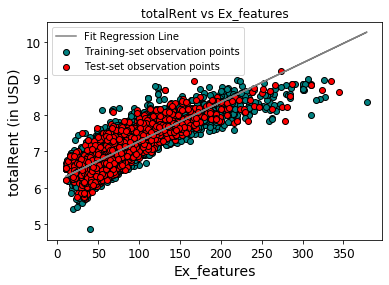

In [50]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train, y_predict, color='grey', label='Fit Regression Line')
plt.title('totalRent vs Ex_features')
plt.xlabel('Ex_features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772, 1)
(1943, 1)
(7772,)
(1943,)


In [62]:

#RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

def randomforestreg(msl, mf, md, xtrain, ytrain, xtest, ytest):
    rfr_best = RandomForestRegressor(n_estimators=70, random_state=1111,
                                     max_depth=md, max_features=mf, min_samples_leaf=msl)
    rfr_best.fit(xtrain,ytrain)
    y_pred_rfr = rfr_best.predict(xtrain)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rfr))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_rfr))
    return y_pred_rfr
#randomforestreg(10, 6, 30, X_train, y_train, X_test, y_test)


In [70]:
"""from sklearn.svm import SVR

scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X.reshape(-1,1))
y = scale_y.fit_transform(y.reshape(-1,1))"""

In [75]:
from sklearn.ensemble import RandomForestRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 42)
forest_regressor.fit(X_train, y_train)


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

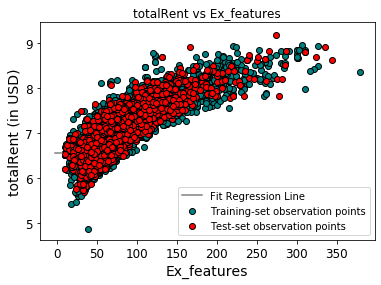

In [76]:

# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), color='grey', label='Fit Regression Line')
plt.title('totalRent vs Ex_features')
plt.xlabel('Ex_features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [347]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

def gradientboostingmachine(md, msl, n, mf, lr, xtrain, ytrain, xtest, ytest):
    gbm_best = GradientBoostingRegressor(n_estimators=n, random_state=1111,
                                         max_depth=md, max_features=mf, 
                                         min_samples_leaf=msl, learning_rate=lr
                                         )
    gbm_best.fit(xtrain, ytrain)
    y_pred_gbm = gbm_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_gbm))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_gbm))
    
#gradientboostingmachine(16, 117, 73, 10, 0.07, X_train, y_train, X_test, y_test)
gradientboostingmachine(16, 117, 157, 5, 0.07, X_train, y_train, X_test, y_test)


MAE: 0.042135882104922445
MSE: 0.0037249508966189712


In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()


scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())


Mean:		  0.18007506769322273 
Standard Deviation: 0.009614603057439854


## more models --------------------------------------------------------------------- end of final models

In [412]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 'baseRent', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [350]:
Berlin[X_var]["livingSpace"]

3        39.55
4        18.56
5        24.31
6        30.33
7        26.52
         ...  
9723    335.00
9725    326.35
9726    220.00
9727    307.00
9729    274.00
Name: livingSpace, Length: 9715, dtype: float64

In [ ]:
Berlin[y_var].head()

In [407]:

from sklearn.linear_model import LinearRegression

#linear_regressor = LinearRegression()
#linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_predict = linear_regressor.predict(X_test.reshape(-1,1))
print(y_predict)

[[6.71593272]
 [7.88333571]
 [6.58002867]
 ...
 [6.66545101]
 [7.01603632]
 [7.15537013]]


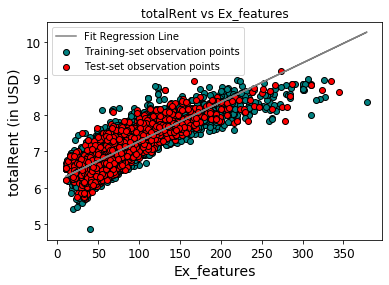

In [339]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train.reshape(-1, 1), linear_regressor.predict(X_train.reshape(-1, 1)), color='grey', label='Fit Regression Line')
plt.title('totalRent vs Ex_features')
plt.xlabel('Ex_features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [ ]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values



## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y)

# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

In [ ]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, linear_reg_model.predict(X), label='Linear regressor fit curve')
plt.plot(X, poly_reg_model.predict(poly_reg.fit_transform(X)), label='Polynmial regressor fit line')
plt.title('totalRent vs Ex_features')
plt.xlabel('Ex_features')
plt.ylabel('totalRent')

plt.legend()
plt.show()

## Simple Vector Regression

In [ ]:
from sklearn.svm import SVR

scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X.reshape(-1,1))
y = scale_y.fit_transform(y.reshape(-1,1))

In [ ]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X, y)

In [ ]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, svr_regressor.predict(X), label='SVR regressor')
plt.title('totalRent vs Ex_features (SVR Regression) ))')
plt.xlabel('Ex_features')
plt.ylabel('Salary')

plt.legend()
plt.show()

## Decision Tree - Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, tree_regressor.predict(X_grid), label='Tree regressor')
plt.title('totalRent vs Ex_features (Tree Regression)')
plt.xlabel('Ex_features')
plt.ylabel('totalRent')

plt.legend()
plt.show()